<a href="https://colab.research.google.com/github/cbalkig/CNNExamples/blob/main/print_frames.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import concurrent.futures
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
working_directory = '/content/drive/MyDrive/AnomalyDetectionInVideos/dummy'

In [3]:
images = []

In [4]:
def preprocess_image(sub_directory_path, file_name):
    img_path = os.path.join(sub_directory_path, file_name)
    if str(img_path)[-3:] == "tif":
        try:
            img = Image.open(img_path)
            img = img.resize((256, 256))
            images.append(img)
        except:
            print("Problem on file", img_path)

In [10]:
def preprocess_images():
    images = []
    with concurrent.futures.ThreadPoolExecutor(max_workers=1) as executor:
        futures = []
        for f in sorted(os.listdir(working_directory)):
            directory_path = os.path.join(working_directory, f)
            if os.path.isdir(directory_path):
                for v in sorted(os.listdir(directory_path)):
                    futures.append(
                        executor.submit(
                            preprocess_image, sub_directory_path=directory_path, file_name=v
                        )
                    )


In [16]:
def show_batch():
    plt.figure(figsize=(10,20))
    count = 0
    for n in range(0, 150, 5):
        count = count + 1
        ax = plt.subplot(10, 5, count)
        plt.title("Frame " + str(n))
        plt.imshow(images[n], cmap='gray')
        plt.axis('off')

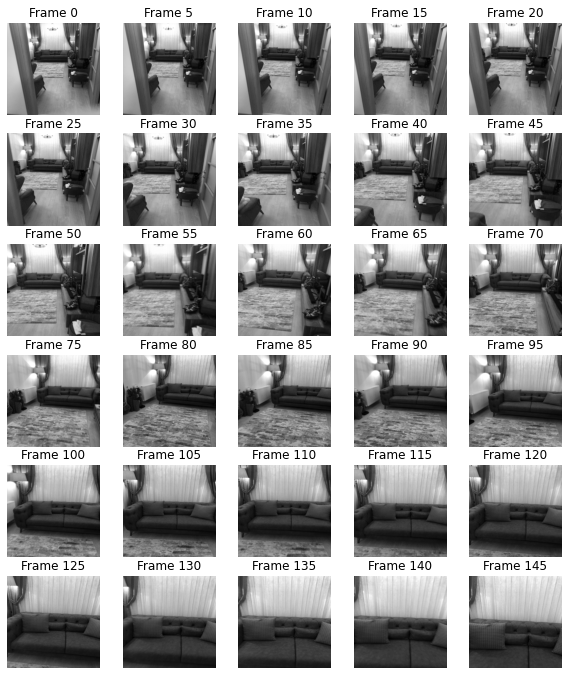

In [17]:
preprocess_images()
show_batch()